In [1]:
# header files
import glob
import csv
import numpy as np
import pandas as pd
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("Header files loaded!")

Header files loaded!


In [2]:
# load files
files = (glob.glob("../../ovarian_cancer_results/collagen_final/sample_1/*"))
print(len(files))

95


In [3]:
print(files)

['../../ovarian_cancer_results/collagen_final/sample_1/TCGA-25-1878.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-2643.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-1809.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-25-1313.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-1028.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-2079.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-2078.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-1029.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-25-1312.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-5X-AA5U.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-25-2396.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-2084.csv', '../../ovarian_cancer_results/collagen_final/sample_1/TCGA-23-2641.csv', '../../ovarian_cancer_results/collagen_final/sampl

In [4]:
# collect features
collagen_features = []
for file in files:
    filename = file.split("/")[-1]
    flag = -1
    file_features = []
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_2/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_3/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_4/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_5/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_6/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_7/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_8/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
                    
    with open("../../ovarian_cancer_results/collagen_final/sample_9/" + filename, newline='') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            if flag == -1:
                array = row
                for index in range(0, len(array)):
                    file_features.append(float(array[index]))
    collagen_features.append(file_features)

In [5]:
# Sepideh features
til_features = []
censor = []
days = []
filenames = []
flag = -1
with open("../../DATA_OC.csv", newline='', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile)
    for row in spamreader:
        if flag == -1:
            flag = 1
        else:
            array = row
            
            filenames.append(array[0])
            features = [float(array[2]), float(array[4]), float(array[5]), float(array[6]), float(array[7])]
            til_features.append(features)
            
            censor.append(bool(int(array[20])))
            days.append(int(array[23]))
print(len(filenames))
print(len(til_features))
print(len(censor))
print(len(days))

103
103
103
103


In [6]:
print(filenames[0])
print(til_features[0])
print(collagen_features[0])
print(censor[0])
print(days[0])

TCGA-23-1021
[0.682027452, -0.280511172, -0.420431852, -0.429332933, -0.614347094]
[2.0773, 0.63186, 2.2962, 1.6644, 2.099, 0.52204, 2.3004, 1.7784, 2.1159, 0.55915, 2.2901, 1.731, 2.131, 0.64197, 2.2891, 1.6471, 2.133, 0.63186, 2.2857, 1.6538, 2.1474, 0.67688, 2.2845, 1.6076, 2.1575, 0.92646, 2.2858, 1.3593, 2.1558, 0.6504, 2.2821, 1.6317, 2.1659, 1.0546, 2.2864, 1.2318]
True
1446


In [7]:
print(filenames[50])
print(til_features[50])
print(collagen_features[50])
print(censor[50])
print(days[50])

TCGA-25-1325
[-0.862786584, -0.194419922, 1.478746708, -1.481532252, -0.222333269]
[2.0278, 0.35668, 2.2969, 1.9403, 2.0674, 0.54058, 2.2927, 1.7521, 2.0891, 0.59001, 2.2965, 1.7065, 2.1073, 0.65272, 2.2929, 1.6402, 2.119, 0.63409, 2.2956, 1.6615, 2.1313, 0.63385, 2.2919, 1.6581, 2.1371, 0.59887, 2.2896, 1.6908, 2.1482, 0.50407, 2.2953, 1.7912, 2.1503, 0.684, 2.2926, 1.6086]
True
976


In [8]:
final_til_features = []
y = []
event = []
survival_time = []
for file in files:
    count = 0
    filename1 = file.split("/")[-1][:-4]
    for filename in filenames:
        filename2 = filename
        if filename1 == filename2:
            final_til_features.append(til_features[count])
            y.append([censor[count], days[count]])
            event.append(censor[count])
            survival_time.append(days[count])
        count += 1
print(len(final_til_features))
print(len(y))
print(len(event))
print(len(survival_time))

95
95
95
95


In [9]:
final_collagen_features = []
for features in collagen_features:
    final_collagen_features.append([features[32], features[21], features[4], features[13], features[34], features[16], features[20], features[30]])
print(len(final_collagen_features))

95


In [10]:
# generate training set
features = []
for index in range(0, 95):
    features.append(final_til_features[index]+final_collagen_features[index])
    #features.append(final_collagen_features[index])
    #features.append(final_til_features[index])
print(len(features))
print(len(features[0]))

95
13


In [11]:
# training and validation set
features = np.array(features)
y = np.array(y)
event = np.array(event)
survival_time = np.array(survival_time)

In [12]:
# main code
iter_scores = []
max_score = -1
max_train_index = []
max_test_index = []
dt = dtype=[('Status', '?'), ('Survival_in_days', '<f8')]
prognostic_count = np.zeros(len(features[0]))
for iter in range(100):
    model_score = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(features):
        # get the training and testing set
        scaler = MinMaxScaler()
        features_train, features_test = features[train_index], features[test_index]
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)
        y_train, y_test = y[train_index], y[test_index]
        event_test, survival_time_test = event[test_index], survival_time[test_index]
        y_train = np.array([tuple(row) for row in y_train], dtype=dt)
        y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
        # remove highly correlated features
        features_train_df = pd.DataFrame(features_train)
        features_test_df = pd.DataFrame(features_test)
        
        # fit model
        estimator = CoxnetSurvivalAnalysis(l1_ratio=0.99, alpha_min_ratio=0.001)
        estimator.fit(features_train_df, y_train)
        
        # score on validation set
        #score = estimator.score(features_test_df, y_test)
        score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
        model_score.append(score)
        if score > max_score:
            max_train_index = train_index
            max_test_index = test_index
            
        # update prognostic count
        for index1 in range(0, len(estimator.coef_)):
            flag = -1
            for index2 in range(0, len(estimator.coef_[index1])):
                if estimator.coef_[index1][index2] > 0:
                    flag = 1
                    break
            if flag == 1:
                prognostic_count[index1] += 1
    
    if len(model_score) > 0:
        iter_scores.append(np.mean(model_score))
        max_score = max(max(model_score), max_score)
print(np.mean(iter_scores), np.std(iter_scores))
print(max_score)
print(prognostic_count)

0.7207076787592483 0.03006876406290286
1.0
[  22.  302.    0. 1000. 1000. 1000. 1000.    0.    0.    0. 1000.    0.
 1000.]


(array([ 1.,  1.,  7.,  7., 24., 24., 12., 17.,  5.,  2.]),
 array([0.62730287, 0.64430133, 0.66129979, 0.67829824, 0.6952967 ,
        0.71229515, 0.72929361, 0.74629207, 0.76329052, 0.78028898,
        0.79728743]),
 <BarContainer object of 10 artists>)

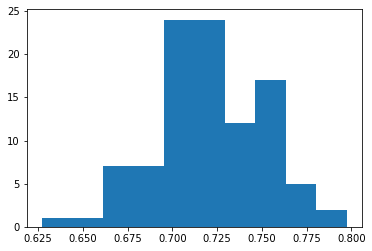

In [13]:
# histogram of c-indexes
plt.hist(iter_scores, bins=10)

In [14]:
# run best model
scaler = MinMaxScaler()
features_train, features_test = features[max_train_index], features[max_test_index]
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
y_train, y_test = y[max_train_index], y[max_test_index]
event_test, survival_time_test = event[max_test_index], survival_time[max_test_index]
y_train = np.array([tuple(row) for row in y_train], dtype=dt)
y_test = np.array([tuple(row) for row in y_test], dtype=dt)
        
# remove highly correlated features
features_train_df = pd.DataFrame(features_train)
features_test_df = pd.DataFrame(features_test)
        
# fit model
estimator = CoxnetSurvivalAnalysis(l1_ratio=0.99, alpha_min_ratio=0.001)
estimator.fit(features_train_df, y_train)
        
# score on validation set
score, _, _, _, _ = concordance_index_censored(event_test, survival_time_test, estimator.predict(features_test_df))
print(score)

0.391304347826087


In [15]:
# find prognostic features
count = 0
for index1 in range(0, len(estimator.coef_)):
    flag = -1
    for index2 in range(0, len(estimator.coef_[index1])):
        if estimator.coef_[index1][index2] > 0:
            flag = 1
            print(index1)
            break
    if flag == 1:
        count += 1
print()
print("Prognostic features count = " + str(count))

3
4
5
6
10
12

Prognostic features count = 6
